<a href="https://colab.research.google.com/github/anasabbad/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Cardivascular Risk Prediction**
# **Problem Description**
The data comes from an ongoing cardiovascular study of people living in the Massachusetts town of Framingham. The classification objective is to identify a patient's 10-year risk of developing coronary heart disease (CHD). Information about the patients is provided by the dataset.

# **Data Description**
It has 15 features and nearly 4,000 recordings. Variables Each attribute has the potential to be a risk factor. The risk factors might be medical, behavioural, or demographic.


Data Description
Demographic:
• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)
Predict variable (desired target)

**Dependent Variable: 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)** 


# **Importing Libraries and Loading the data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

data = pd.read_csv("/content/drive/MyDrive/Capstone Projects/Cardiovascular_Risk_Prediction/data_cardiovascular_risk.csv")

In [ ]:
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


# Data Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

**Checking for Null values**

In [ ]:
# Missing Value Count Function
def show_missing():
    missing = data.columns[data.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(data[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(data[show_missing()].isnull().sum().sort_values(ascending = False)/len(data)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


In [ ]:
#imputing education and BPMeds columns with mode
data['education'] = data['education'].fillna(data['education'].mode()[0])
data['BPMeds'] = data['BPMeds'].fillna(data['BPMeds'].mode()[0])

#imputing glucose,totChol,BMI and heartRate columns with median
data['glucose'] = data['glucose'].fillna(data['glucose'].median())
data['totChol'] = data['totChol'].fillna(data['totChol'].median())
data['BMI'] = data['BMI'].fillna(data['BMI'].median())
data['heartRate'] = data['heartRate'].fillna(data['heartRate'].median())
data['cigsPerDay'] = data['cigsPerDay'].fillna(data['heartRate'].median())



In [ ]:
data.BPMeds.unique()

array([0., 1.])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
data['BPMeds']=data['BPMeds'].astype('int')
data['education']=data['education'].astype('int')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   int64  
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   int64  
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(7),

#Exploratory Data Analysis

## Exploring the dependent variable

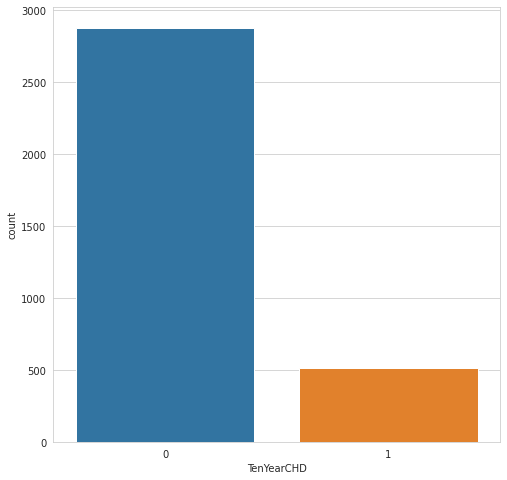

In [ ]:
sns.countplot(x=data['TenYearCHD'])

The data is unbalanced. But a tree based algorithm or SMOTE technique can handle this.

In [ ]:
#converting the cigsPerDay column from object to integer
data['cigsPerDay']=data['cigsPerDay'].astype(str).astype(float)

#converting the education, BPMeds column from float to integer
#data['education']=data['education'].astype(int)
#data['BPMeds']=data['BPMeds'].astype(int)



In [ ]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 2 categorical variables


In [ ]:
# find Numerical variables
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 15 numerical variables


In [ ]:
discrete = []
for var in numerical:
    if len(data[var].unique())<20:
        print(var, ' values: ', data[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

education  values:  [2 4 1 3]
BPMeds  values:  [0 1]
prevalentStroke  values:  [0 1]
prevalentHyp  values:  [0 1]
diabetes  values:  [0 1]
TenYearCHD  values:  [1 0]
There are 6 discrete variables


In [ ]:
continuous = [var for var in numerical if var not in discrete and var not in ['id']]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


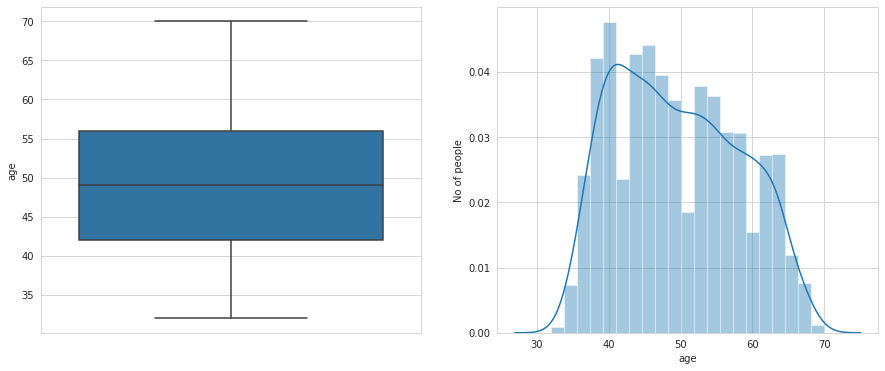

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


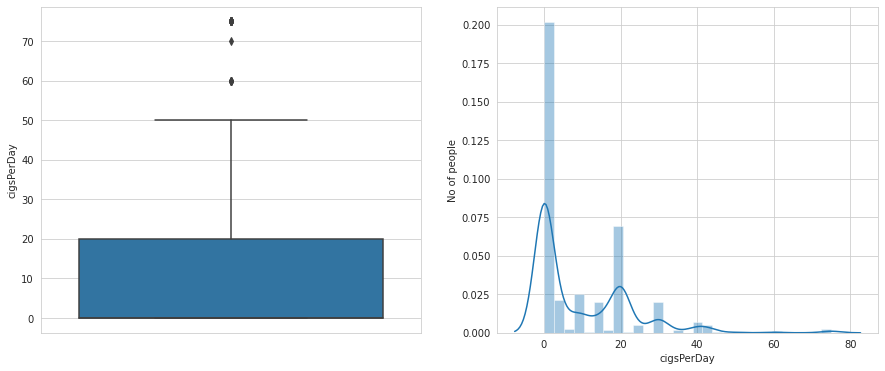

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


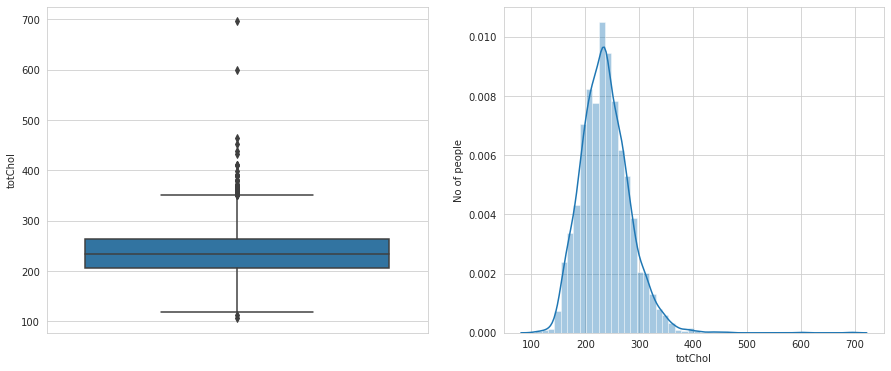

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


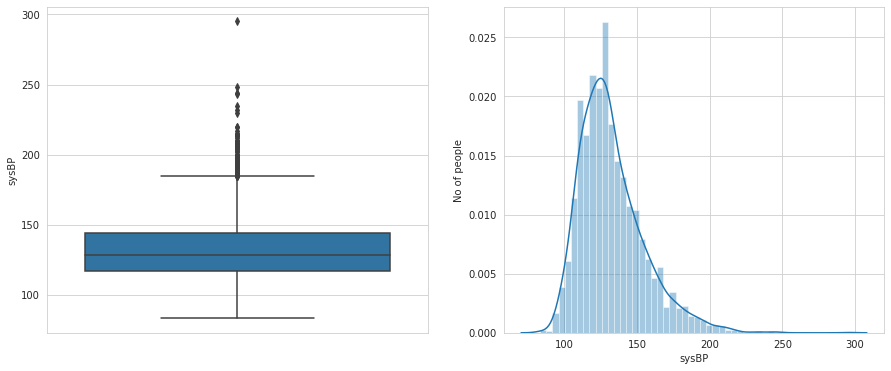

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


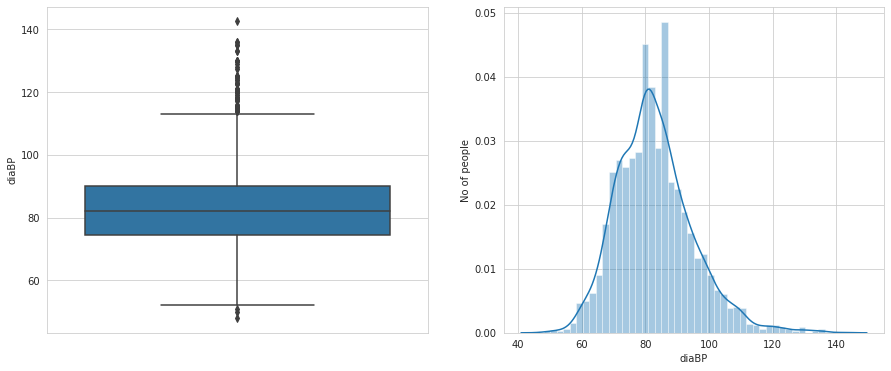

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


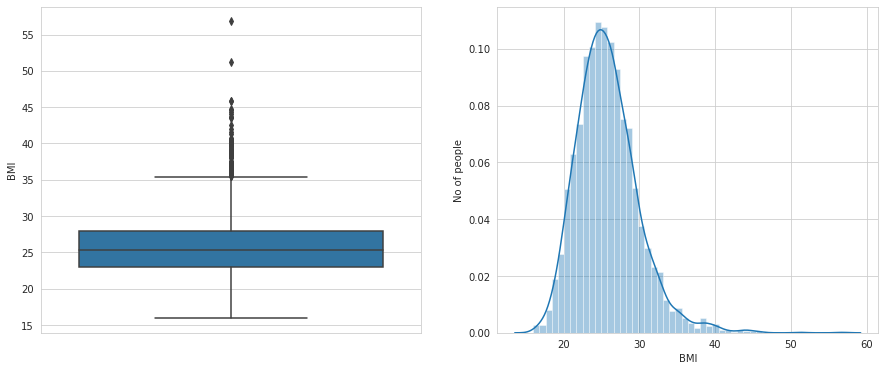

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


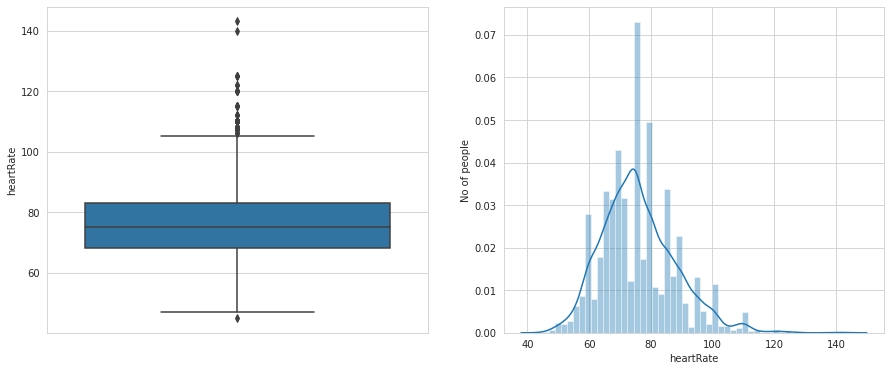

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


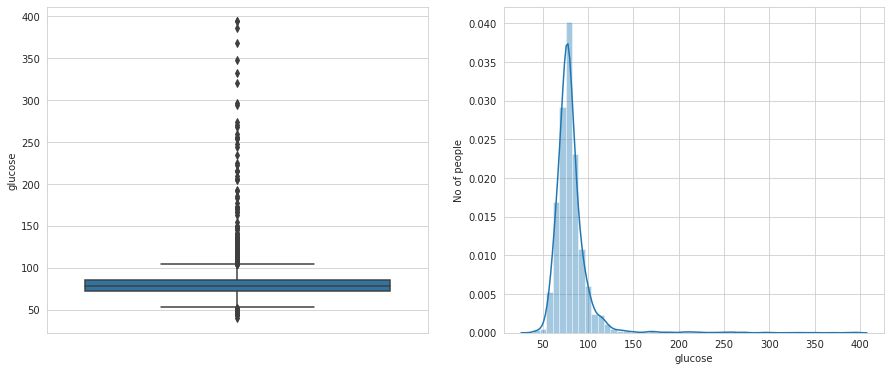

In [ ]:
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=data[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(data[var].dropna())
    fig.set_ylabel('No of people')
    fig.set_xlabel(var)

    plt.show()

# Categorical variables

# Sex

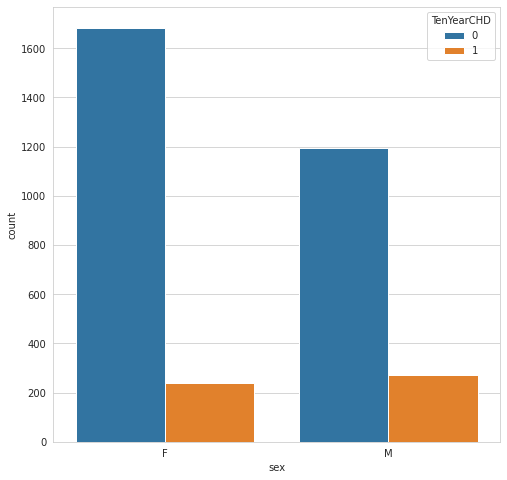

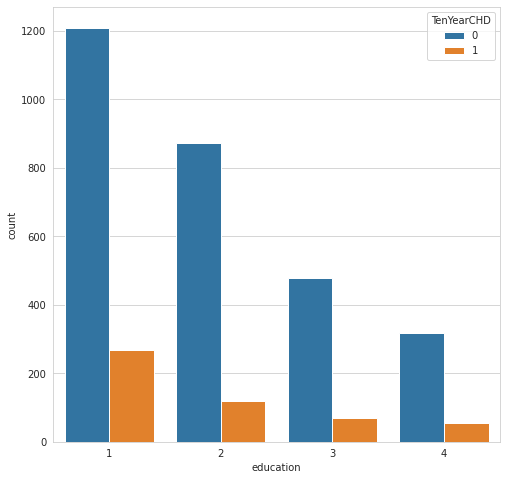

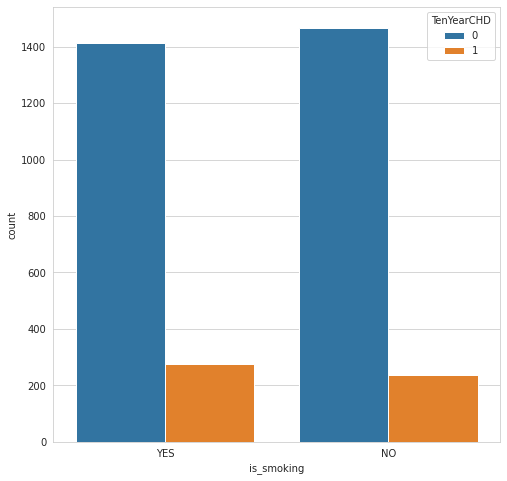

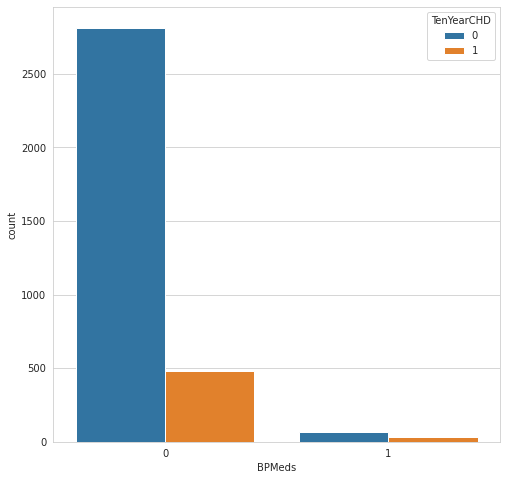

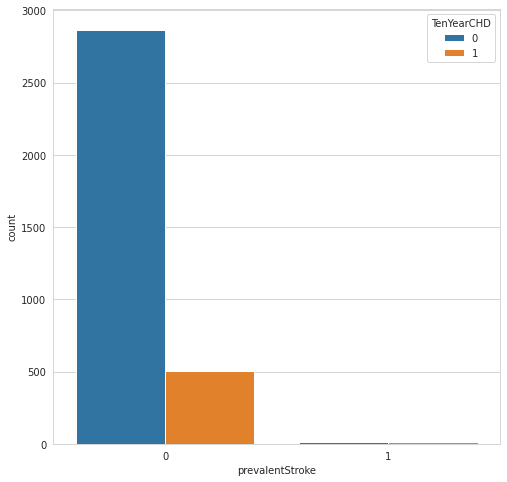

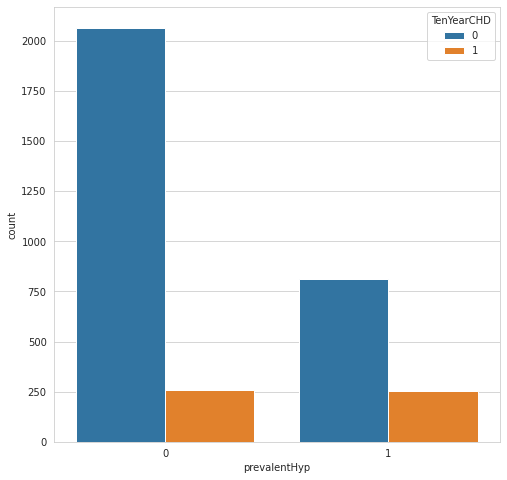

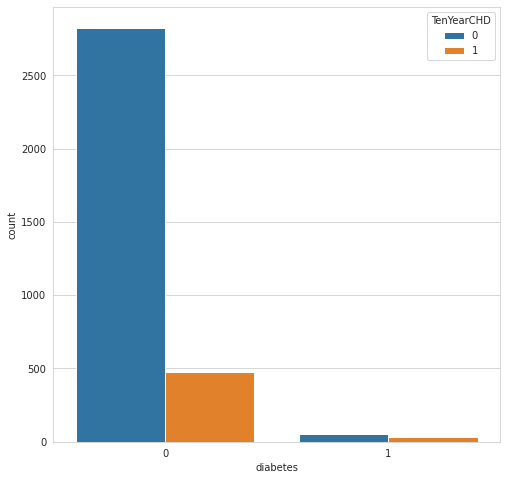

In [ ]:
sns.countplot(x='sex', data=data, hue='TenYearCHD')
plt.show()
sns.countplot(x='education', data=data, hue='TenYearCHD')
plt.show()
sns.countplot(x='is_smoking', data=data, hue='TenYearCHD')
plt.show()
sns.countplot(x='BPMeds', data=data, hue='TenYearCHD')
plt.show()
sns.countplot(x='prevalentStroke', data=data, hue='TenYearCHD')
plt.show()
sns.countplot(x='prevalentHyp', data=data, hue='TenYearCHD')
plt.show()
sns.countplot(x='diabetes', data=data, hue='TenYearCHD')
plt.show()

In [ ]:
data = data.drop('id', axis=1)

In [ ]:
data.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,49.542183,1.946018,9.497345,0.029499,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.793251,75.976991,81.720059,0.150737
std,8.592878,1.017568,12.970396,0.169224,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.107026,11.970114,23.161265,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000
max,70.000000,4.000000,75.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
data.duplicated().sum()

0

# Correlation Heatmap

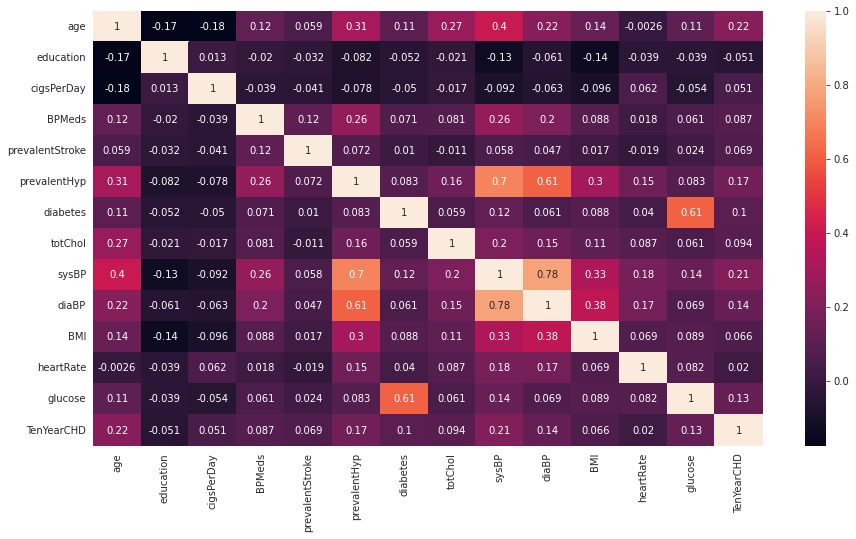

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

# Feature Encoding

In [ ]:
def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical:
    data = one_hot_encoding(data, col)
data.head()  

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_M,is_smoking_YES
0,64,2,3.0,0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,0,1
1,36,4,0.0,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,1,0
2,46,1,10.0,0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,0,1
3,50,1,20.0,0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,1,1
4,64,1,30.0,0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   int64  
 2   cigsPerDay       3390 non-null   float64
 3   BPMeds           3390 non-null   int64  
 4   prevalentStroke  3390 non-null   int64  
 5   prevalentHyp     3390 non-null   int64  
 6   diabetes         3390 non-null   int64  
 7   totChol          3390 non-null   float64
 8   sysBP            3390 non-null   float64
 9   diaBP            3390 non-null   float64
 10  BMI              3390 non-null   float64
 11  heartRate        3390 non-null   float64
 12  glucose          3390 non-null   float64
 13  TenYearCHD       3390 non-null   int64  
 14  sex_M            3390 non-null   uint8  
 15  is_smoking_YES   3390 non-null   uint8  
dtypes: float64(7), int64(7), uint8(2)
memory usage: 377.5 KB


In [ ]:
#data = pd.get_dummies(data, prefix='education', columns=['education'])


In [ ]:
data.head()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_M,is_smoking_YES
0,64,2,3.0,0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,0,1
1,36,4,0.0,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,1,0
2,46,1,10.0,0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,0,1
3,50,1,20.0,0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,1,1
4,64,1,30.0,0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,0,1


In [ ]:
#moving the target variable to the end for simplicity
df1 = data.pop('TenYearCHD') # remove column TenYearCHD and store it in df1

data['TenYearCHD']=df1 # add TenYearCHD series as a 'new' column.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   int64  
 2   cigsPerDay       3390 non-null   float64
 3   BPMeds           3390 non-null   int64  
 4   prevalentStroke  3390 non-null   int64  
 5   prevalentHyp     3390 non-null   int64  
 6   diabetes         3390 non-null   int64  
 7   totChol          3390 non-null   float64
 8   sysBP            3390 non-null   float64
 9   diaBP            3390 non-null   float64
 10  BMI              3390 non-null   float64
 11  heartRate        3390 non-null   float64
 12  glucose          3390 non-null   float64
 13  sex_M            3390 non-null   uint8  
 14  is_smoking_YES   3390 non-null   uint8  
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(7), int64(7), uint8(2)
memory usage: 377.5 KB


In [ ]:
independent= data.columns[:-1].tolist()
independent

['age',
 'education',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'sex_M',
 'is_smoking_YES']

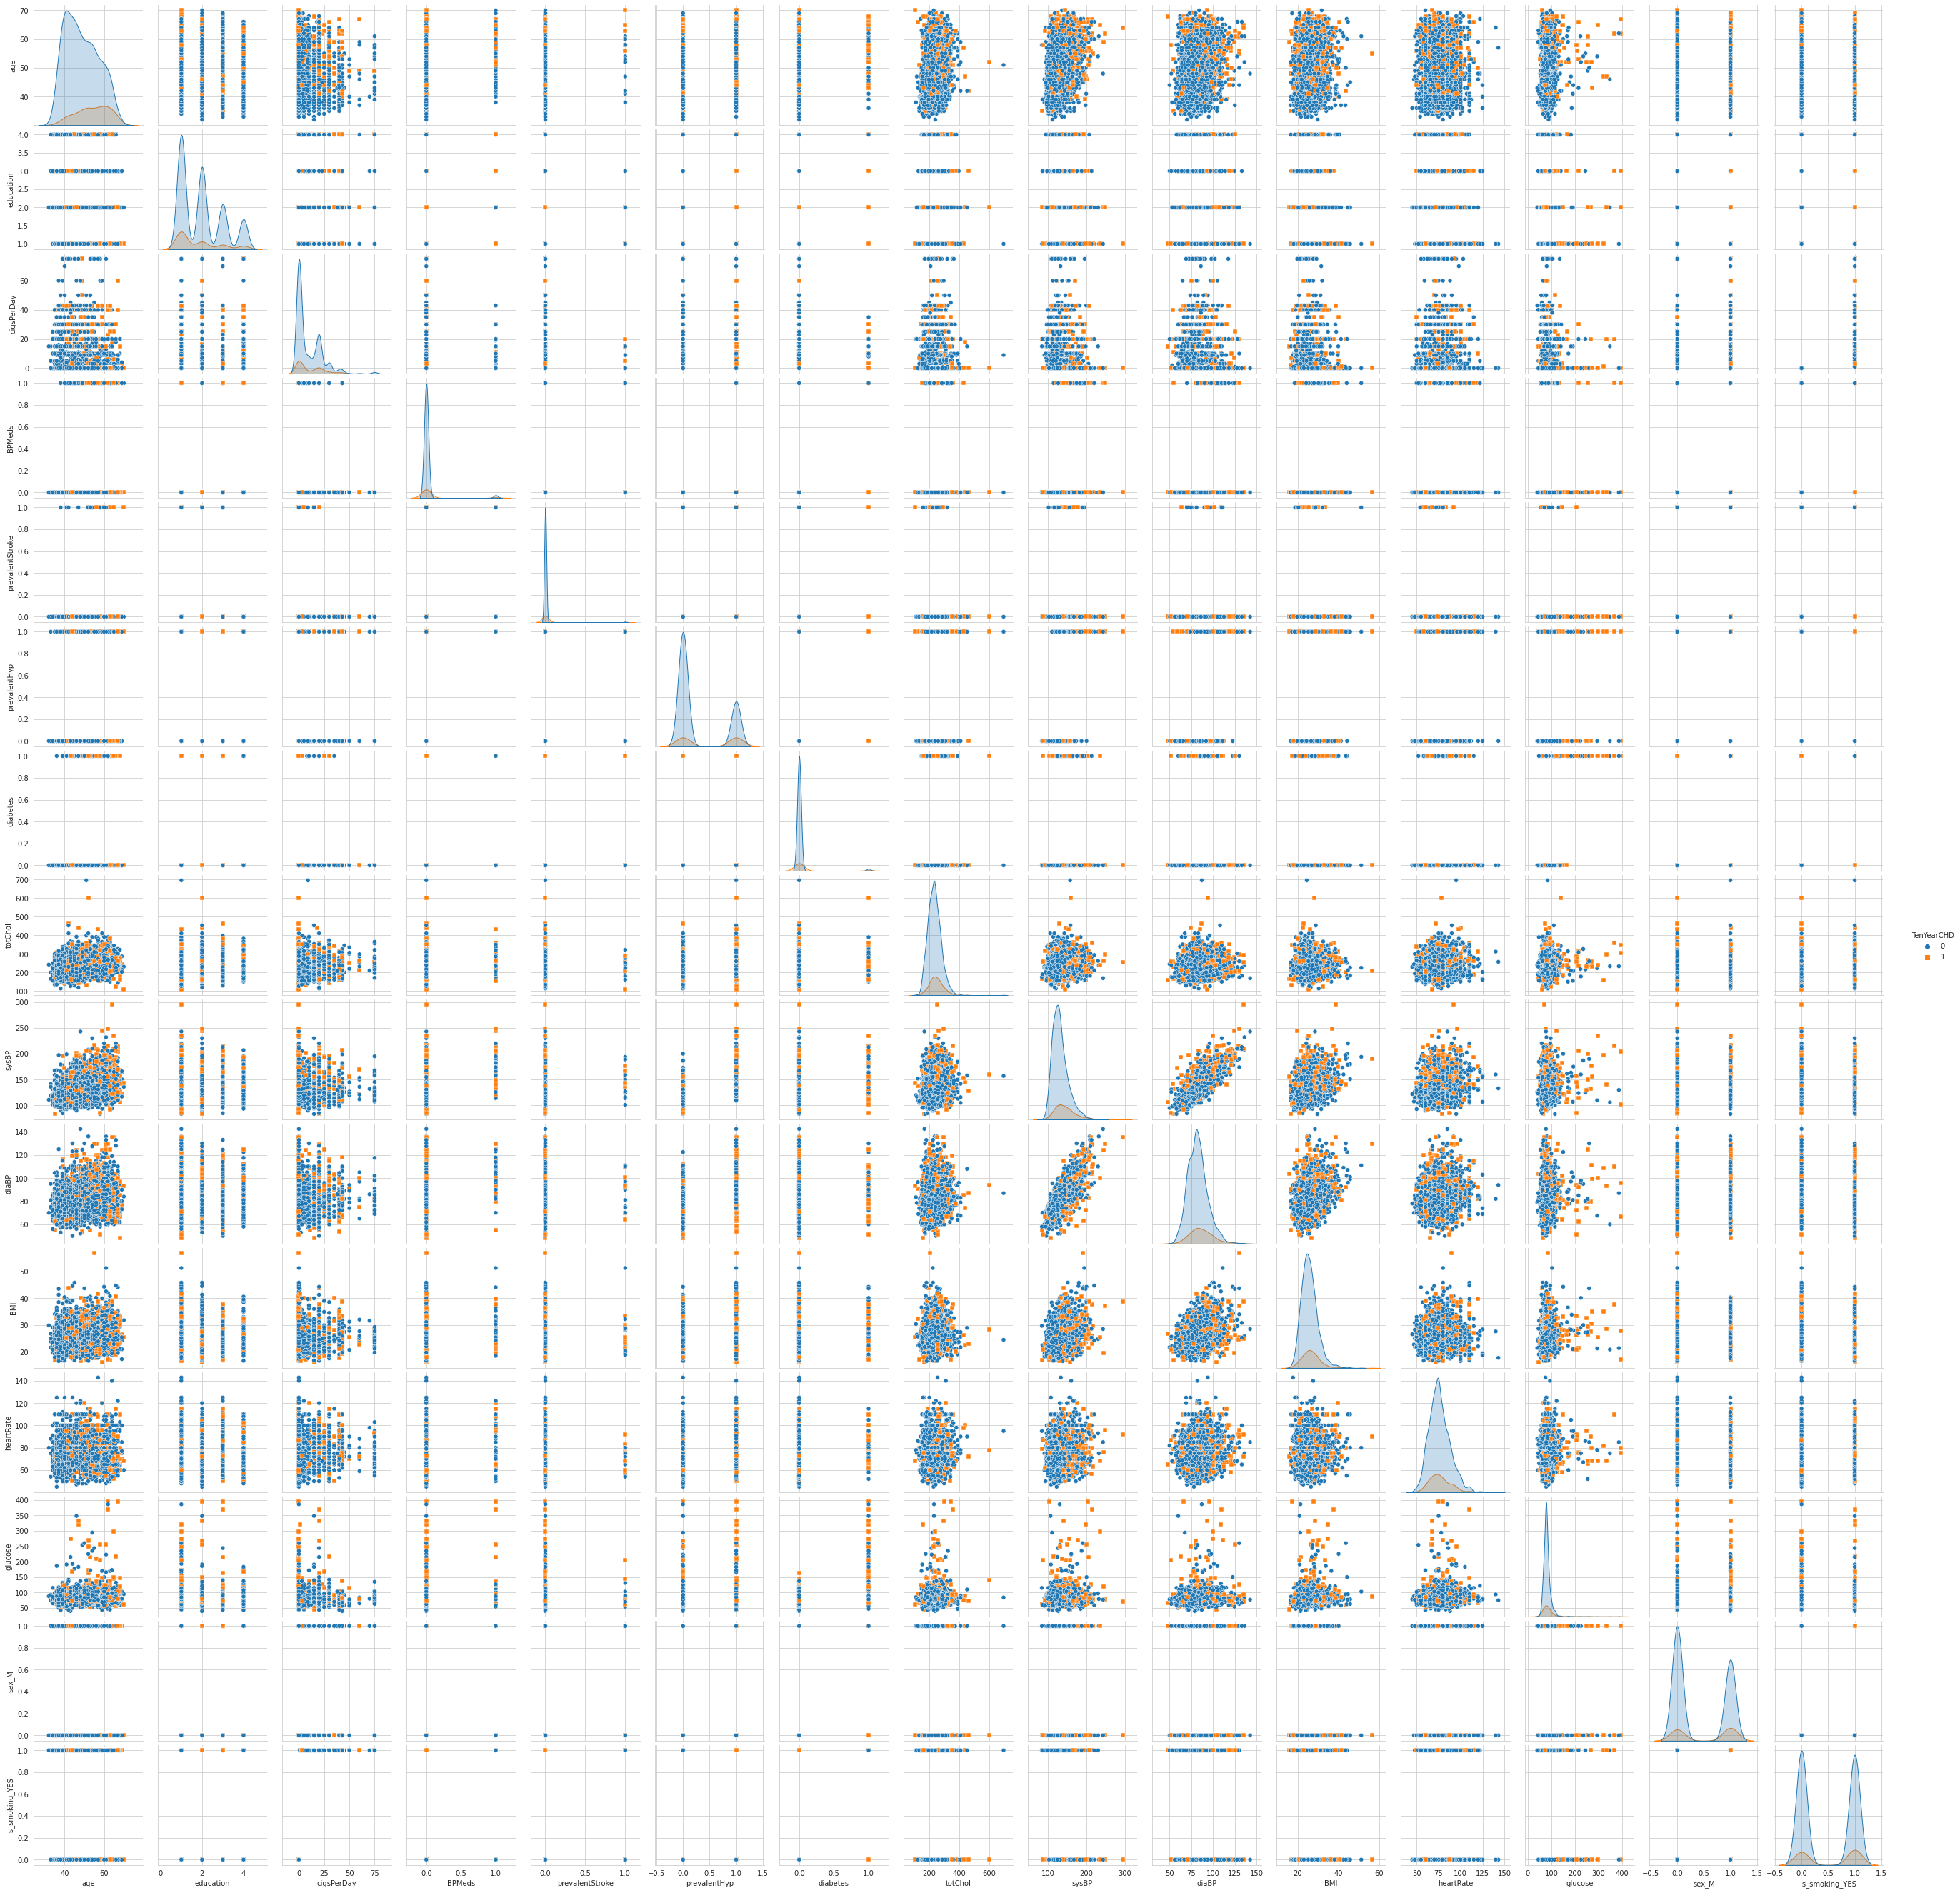

In [ ]:
sns.pairplot(data, hue = 'TenYearCHD', markers=["o", "s"], vars = independent)

#Prediction

# Train-test split


* Split the dataset into train and test using stratified sampling on our dependent variable since it is unbalanced
* Using a stratified sampling ensures the distribution of dependent variable remains same across train and test datasets

In [ ]:
X = data[independent]
y = data.iloc[:,-1]

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_smote, y_smote = sm.fit_resample(X, y.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_smote.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_smote == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_smote == 0)))

Before OverSampling, counts of label '1': 511
Before OverSampling, counts of label '0': 2879 

After OverSampling, the shape of train_X: (5758, 15)
After OverSampling, the shape of train_y: (5758,) 

After OverSampling, counts of label '1': 2879
After OverSampling, counts of label '0': 2879


In [ ]:
# new dataset
data2 = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
data2.columns = data.columns
data2.head()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex_M,is_smoking_YES,TenYearCHD
0,64,2,3.0,0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,0,1,1
1,36,4,0.0,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,1,0,0
2,46,1,10.0,0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,0
3,50,1,20.0,0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,1,1
4,64,1,30.0,0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,1,0


In [ ]:
X_new = data2[independent]
y_new= data2.iloc[:,-1]
X_new.head()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex_M,is_smoking_YES
0,64,2,3.0,0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,0,1
1,36,4,0.0,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,1,0
2,46,1,10.0,0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1
3,50,1,20.0,0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,1
4,64,1,30.0,0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,1


In [ ]:
# Splitting the dataset into the Training set and Test set
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=33, stratify = y_new)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [ ]:
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

The shape of train dataset :
(4606, 15)

 The shape of test dataset :
(1152, 15)


In [ ]:
print("Distribution of classes of dependent variable in train :")
print(y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(y_test.value_counts())

Distribution of classes of dependent variable in train :
1    2303
0    2303
Name: TenYearCHD, dtype: int64

 Distribution of classes of dependent variable in test :
1    576
0    576
Name: TenYearCHD, dtype: int64


# Hyperparameter tuning & Fitting

# 1.Random forest Classifier

In [ ]:
# Hyperparameter tuning

# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Fit the object to train dataset
#classifier.fit(X_train, y_train)

In [ ]:
param_dict

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

In [ ]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [ ]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:
rf_optimal_model = rf_grid.best_estimator_

In [ ]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
# Making predictions on train and test data

rf_train_class_preds = rf_optimal_model.predict(X_train)
rf_test_class_preds = rf_optimal_model.predict(X_test)


# Get the probabilities on train and test
rf_train_preds = rf_optimal_model.predict_proba(X_train)[:,1]
rf_test_preds = rf_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
train_preds = np.where(train_preds > 0.5, 1, 0)
test_preds = np.where(test_preds > 0.5, 1, 0)

In [ ]:
len(train_preds)

4606

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_score, recall_score, f1_score,classification_report,roc_curve

In [ ]:
# Calculating accuracy,f1_score, recall, precision on train and test
rf_train_accuracy = accuracy_score(y_train,rf_train_class_preds)
rf_test_accuracy = accuracy_score(y_test,rf_test_class_preds)

rf_train_precision_score = precision_score(y_train,rf_train_class_preds)
rf_test_precision_score = precision_score(y_test,rf_test_class_preds)

rf_train_recall_score = recall_score(y_train,rf_train_class_preds)
rf_test_recall_score = recall_score(y_test,rf_test_class_preds)

rf_train_f1_score = f1_score(y_train,rf_train_class_preds)
rf_test_f1_score = f1_score(y_test,rf_test_class_preds)


print("The accuracy on train dataset is", rf_train_accuracy)
print("The accuracy on test dataset is", rf_test_accuracy)

The accuracy on train dataset is 0.7666087711680417
The accuracy on test dataset is 0.7395833333333334


In [ ]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [ ]:
train_cm

array([[2284,   19],
       [  60, 2243]])

In [ ]:
test_cm

array([[508,  68],
       [ 79, 497]])

In [ ]:
# Get the roc_auc score for train and test dataset
rf_train_auc = roc_auc_score(y_train,train_preds)
rf_test_auc = roc_auc_score(y_test,test_preds)

In [ ]:
rf_train_auc

0.9828484585323491

In [ ]:
rf_test_auc

0.8723958333333333

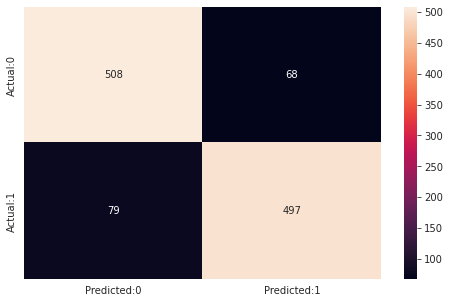

In [ ]:
cm=confusion_matrix(y_test,test_preds)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

In [ ]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       576
           1       0.88      0.86      0.87       576

    accuracy                           0.87      1152
   macro avg       0.87      0.87      0.87      1152
weighted avg       0.87      0.87      0.87      1152



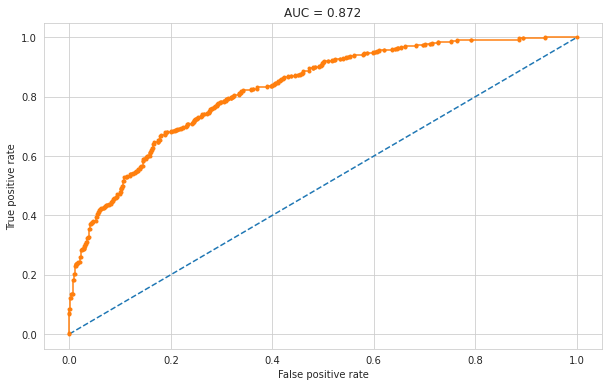

In [ ]:
# ROC curve and AUC 
probs = rf_optimal_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(rf_test_auc,3)}")
plt.show()

# 2. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}


# Create an instance of the RandomForestClassifier
log_model = LogisticRegression()

# Grid search
log_grid = GridSearchCV(estimator=log_model,
                       param_grid = params,
                       cv = 5, verbose=2, scoring='roc_auc')
log_grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ..........C=0.01, class_weight=balanced, penalty=l1; total time=   0.0s
[CV] END ..........C=0.01, class_weight=balanced, penalty=l1; total time=   0.0s
[CV] END ..........C=0.01, class_weight=balanced, penalty=l1; total time=   0.0s
[CV] END ..........C=0.01, class_weight=balanced, penalty=l1; total time=   0.0s
[CV] END ..........C=0.01, class_weight=balanced, penalty=l1; total time=   0.0s
[CV] END ..........C=0.01, class_weight=balanced, penalty=l2; total time=   0.1s
[CV] END ..........C=0.01, class_weight=balanced, penalty=l2; total time=   0.1s
[CV] END ..........C=0.01, class_weight=balanced, penalty=l2; total time=   0.1s
[CV] END ..........C=0.01, class_weight=balanced, penalty=l2; total time=   0.1s
[CV] END ..........C=0.01, class_weight=balanced, penalty=l2; total time=   0.1s
[CV] END ..............C=0.01, class_weight=None, penalty=l1; total time=   0.0s
[CV] END ..............C=0.01, class_weight=Non

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=2)

In [ ]:
log_grid.best_estimator_

LogisticRegression(C=10, class_weight='balanced')

In [ ]:
log_optimal_model = log_grid.best_estimator_

In [ ]:
log_grid.best_params_

{'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}

In [ ]:
# Making predictions on train and test data

train_class_preds = log_optimal_model.predict(X_train)
test_class_preds = log_optimal_model.predict(X_test)


# Get the probabilities on train and test
train_preds = log_optimal_model.predict_proba(X_train)[:,1]
test_preds = log_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
train_preds = np.where(log_train_preds > 0.5, 1, 0)
test_preds = np.where(log_train_preds > 0.5, 1, 0)

In [ ]:
# Calculating accuracy,f1_score, recall, precision on train and test
log_train_accuracy = accuracy_score(y_train,train_class_preds)
log_test_accuracy = accuracy_score(y_test,test_class_preds)

log_train_precision_score = precision_score(y_train,train_class_preds)
log_test_precision_score = precision_score(y_test,test_class_preds)

log_train_recall_score = recall_score(y_train,train_class_preds)
log_test_recall_score = recall_score(y_test,test_class_preds)

log_train_f1_score = f1_score(y_train,train_class_preds)
log_test_f1_score = f1_score(y_test,test_class_preds)

print("The accuracy on train dataset is", log_train_accuracy)
print("The accuracy on test dataset is", log_test_accuracy)

The accuracy on train dataset is 0.6834563612679114
The accuracy on test dataset is 0.6918402777777778


In [ ]:
# Get the confusion matrices for train and test
log_train_cm = confusion_matrix(y_train,train_class_preds)
log_test_cm = confusion_matrix(y_test,test_class_preds )

In [ ]:
log_train_cm

array([[1560,  743],
       [ 715, 1588]])

In [ ]:
log_test_cm

array([[399, 177],
       [178, 398]])

In [ ]:
# Get the roc_auc score for train and test dataset
log_train_auc = roc_auc_score(y_train,log_train_preds)
log_test_auc = roc_auc_score(y_test,test_class_preds)

In [ ]:
log_train_auc

0.6834563612679115

In [ ]:
log_test_auc

0.6918402777777777

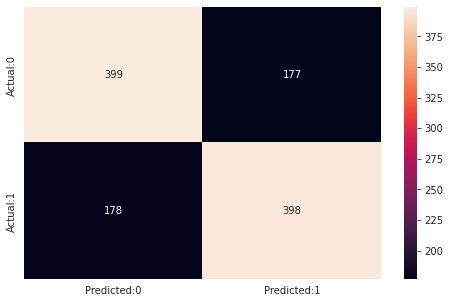

In [ ]:
cm=confusion_matrix(y_test,test_class_preds)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

In [ ]:
print(classification_report(y_test,test_class_preds))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       576
           1       0.69      0.69      0.69       576

    accuracy                           0.69      1152
   macro avg       0.69      0.69      0.69      1152
weighted avg       0.69      0.69      0.69      1152



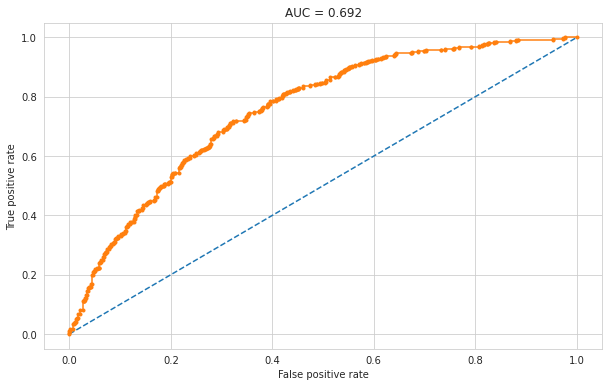

In [ ]:
# ROC curve and AUC 
probs = log_optimal_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_test_auc,3)}")
plt.show()

# 3. XGB Classifier

In [ ]:
# Hyperparameter tuning

# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the XGBClassifier
xgb_model = XGBClassifier()

# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [ ]:
xgb_grid.best_estimator_

XGBClassifier(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:

xgb_optimal_model = xgb_grid.best_estimator_

In [ ]:
xgb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
# Making predictions on train and test data

train_class_preds = xgb_optimal_model.predict(X_train)
test_class_preds = xgb_optimal_model.predict(X_test)


# Get the probabilities on train and test
train_preds = xgb_optimal_model.predict_proba(X_train)[:,1]
test_preds = xgb_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
train_preds = np.where(train_preds > 0.5, 1, 0)
test_preds = np.where(test_preds > 0.5, 1, 0)

In [ ]:
# Calculating accuracy,f1_score, recall, precision on train and test
xgb_train_accuracy = accuracy_score(y_train,train_class_preds)
xgb_test_accuracy = accuracy_score(y_test,test_class_preds)

xgb_train_precision_score = precision_score(y_train,train_class_preds)
xgb_test_precision_score = precision_score(y_test,test_class_preds)

xgb_train_recall_score = recall_score(y_train,train_class_preds)
xgb_test_recall_score = recall_score(y_test,test_class_preds)

xgb_train_f1_score = f1_score(y_train,train_class_preds)
xgb_test_f1_score = f1_score(y_test,test_class_preds)

print("The accuracy on train dataset is", xgb_train_accuracy)
print("The accuracy on test dataset is", xgb_test_accuracy)

The accuracy on train dataset is 0.9828484585323491
The accuracy on test dataset is 0.8723958333333334


In [ ]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [ ]:
train_cm

array([[2284,   19],
       [  60, 2243]])

In [ ]:
train_cm

array([[2284,   19],
       [  60, 2243]])

In [ ]:
# Get the roc_auc score for train and test dataset
xgb_train_auc = roc_auc_score(y_train,train_preds)
xgb_test_auc = roc_auc_score(y_test,test_preds)

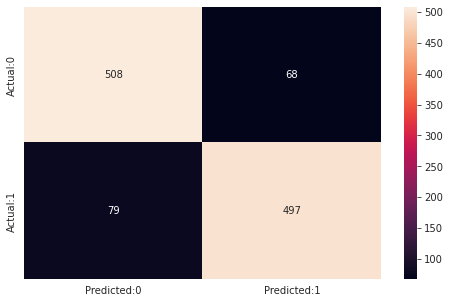

In [ ]:
cm=confusion_matrix(y_test,test_preds)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

In [ ]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       576
           1       0.88      0.86      0.87       576

    accuracy                           0.87      1152
   macro avg       0.87      0.87      0.87      1152
weighted avg       0.87      0.87      0.87      1152



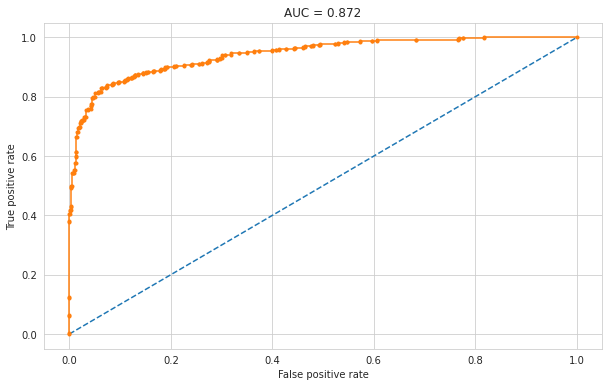

In [ ]:
# ROC curve and AUC 
probs = xgb_optimal_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(xgb_test_auc,3)}")
plt.show()

# Comparison of Models

In [538]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_test_accuracy, 'recall':log_test_recall_score, 'precision ':log_test_precision_score,'AUC':log_test_auc, 'F1 score':log_test_f1_score},
    "Random Forest Classifier":{'Accuracy':rf_test_accuracy,'recall':rf_test_recall_score, 'precision ':rf_test_precision_score, 'AUC':rf_test_auc, 'F1 score':rf_test_f1_score},
    "XGB Classifier":{'Accuracy':xgb_test_accuracy,'recall':xgb_test_recall_score, 'precision ':xgb_test_precision_score, 'AUC':xgb_test_auc, 'F1 score':xgb_test_f1_score}})

In [550]:
comparison=comparison.round(2)
comparison

,Accuracy,recall,precision,AUC,F1 score
Logistic regression,0.69,0.69,0.69,0.69,0.69
Random Forest Classifier,0.74,0.76,0.73,0.87,0.74
XGB Classifier,0.87,0.86,0.88,0.87,0.87


Text(0, 0.5, 'Y-axis')

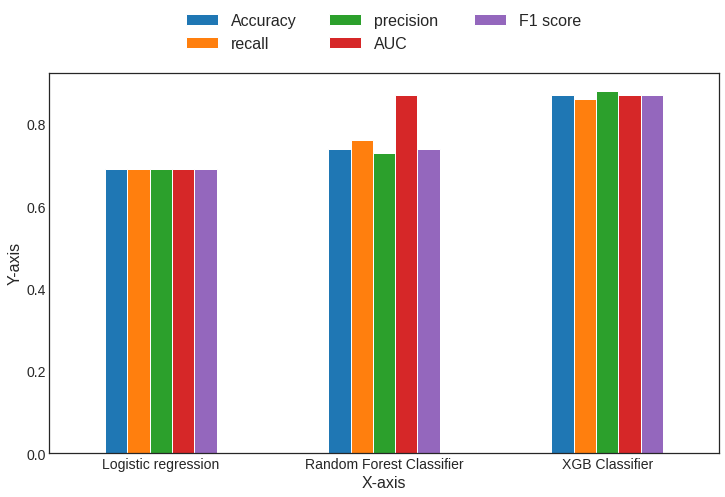

In [551]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')
ax = comparison.plot.bar(figsize=[12, 7])
ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower center", ncol=3, fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.tick_params(axis='both', labelsize=14)
ax.set_xlabel("X-axis", fontsize=16)
ax.set_ylabel("Y-axis", fontsize=16)

**It could be seen from the comparison that the performance of the XGB Classifier is the best**